## **The Sanrio Index** 

## Objectives
1. Analyse historical Sanrio character rankings.
2. Identify trends, patterns, and key insights from the dataset 
3. Develop predictive models to forecast future rankings
4. Prepare a cleaned dataset for visualisations in Tableau

## Inputs
'SanrioRank.csv': Historical ranking data

## Outputs
1. Cleaned dataset: 'CleanedSanrioRank.csv'
2. Visual insights through Tableau for story telling and analysis 
3. Predictive insights via linear regression for future rankings

## Additional Comments
1. Ensure data integrity by handling missing values and duplicates 
2. Ethical considerations include recognising data biases and cultural influences in ranking trends 



---

To analyse the Sanrio rankings dataset effectively, the following steps were taken: 

# 1. Data Understanding and Preparation

- The dataset was checked for null values and duplicates, ensuring data integrity 
- Character names were standardised to maintain consistency 
- The 'Year' column was converted to a datetime format to facilitate time series analysis

In [1]:
# Import Libraries 
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\tmqhu\\Documents\\Sanrio_Ranking\\jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
# Confirm The New Current Directory
current_dir = os.getcwd()
current_dir

'c:\\Users\\tmqhu\\Documents\\Sanrio_Ranking'

In [4]:
 # Import The Library
import pandas as pd 
import numpy as np

# Load The Dataset
df = pd.read_csv('inputs/SanrioRank.csv') # Load the dataset

In [5]:
# Inspect Data
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                390 non-null    int64  
 1   Rank                390 non-null    int64  
 2   Character Name      390 non-null    object 
 3   Unique Characters   64 non-null     object 
 4   Debut               63 non-null     float64
 5   First Year Ranked   64 non-null     float64
 6   Latest Year Ranked  64 non-null     float64
 7   Total Times Ranked  64 non-null     float64
 8   Highest Rank        64 non-null     float64
 9   Lowest Rank         64 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 30.6+ KB


,Year,Rank,Debut,First Year Ranked,Latest Year Ranked,Total Times Ranked,Highest Rank,Lowest Rank
count,390.000000,390.000000,63.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2005.000000,5.500000,1993.571429,1998.843750,2006.218750,6.093750,5.375000,8.796875
std,11.269085,2.875971,16.116225,10.541255,12.556499,7.945686,3.098899,1.370664
min,1986.000000,1.000000,1919.000000,1986.000000,1986.000000,1.000000,1.000000,5.000000
25%,1995.000000,3.000000,1985.000000,1988.000000,1996.000000,1.000000,2.750000,8.000000
50%,2005.000000,5.500000,1996.000000,1997.500000,2005.000000,3.000000,5.000000,9.000000
75%,2015.000000,8.000000,2004.500000,2006.000000,2016.250000,6.250000,8.250000,10.000000
max,2024.000000,10.000000,2015.000000,2021.000000,2024.000000,39.000000,10.000000,10.000000


In [6]:
# Check Missing Values and Duplicates 
df.isnull().sum()
df.drop_duplicates(inplace=True)

# Standardise Character Names
df['Character Name'] = df['Character Name'].str.strip().str.title()

# Convert Date Format 
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


---

# 2. Feature Engineering 

- A 'Decade' column was added to capture long term trends
- The 'Rank shift' column was introduced to track movement between years 
- Percentile ranking was calculated to assess popularity distribution 

In [7]:
# Add Decade Column
df['Decade'] = (df['Year'].dt.year//10)* 10

# Frequency Of Character Appearance 
appearance_count = df['Character Name'].value_counts().reset_index()
appearance_count.columns = ['Character Name','Count']

# Ranking Shifts 
df['Rank Shift'] = df.groupby('Character Name')['Rank'].diff()

# Popularity Perecntile Scores 
df['Percentile'] = df['Rank'].rank(pct=True)

---

# 3. Exploratory Data Analysis 

- Visuals such as line plots, box plots and heatmaps were employed to understand character performance across the years 

In [8]:
# Get summary of the dataset
df.describe()

# Check unique values in columns 
df['Character Name'].unique()

array(['Zashikibuta', 'Snoopy', 'Hangyodon', 'Tuxedosam',
       'Nyaninyunyenyon', 'The Vaudeville Duo', '?', 'Hello Kitty',
       'Teddy The Teddy', 'Cottontails', 'Marroncream', 'Minna No Tābō',
       "Pokopon'S Diary", "Brownie'S Story", 'Felix The Cat',
       'Noranekoland', 'Umeyazakkaten', 'Kerokerokeroppi', 'Pochacco',
       'Ahiru No Pekkle', 'Rururugakuen', 'Little Cottonwood Cottage',
       'Patapatapeppy', 'Osaru No Monkichi', "Mr. Bear'S Dream",
       'Bad Badtz-Maru', 'Honeyfield', 'Sugar Cream Puff', 'Pompompurin',
       'My Melody', 'Little Twin Stars', 'Chococat', 'Patty & Jimmy',
       'Dear Daniel', 'Corocorokuririn', 'Pink No Corisu',
       'Taraiguma No Landry', 'Sweetcoron', 'Chocopanda', 'Muffin',
       'U*Sa*Ha*Na', 'Cinnamoroll', 'Okigaru Friends', 'Chibimaru',
       'Charmmykitty', 'Sugarbunnies', 'Mocha', 'Kuromi', 'Cinnamoangels',
       'Marshmallowmitainafuwafuwanyanko', 'Jewelpet', 'Goexpanda',
       'Turfy', 'Fuku-Chan', 'Gudetama', 'Kirimi-C

In [9]:
# Mean, Median and Mode of Rankings
df.groupby('Character Name').agg({'Rank': ['mean', 'median', lambda x: x.mode().iloc[0]]}) # Had a ValueError, Asked ChatGPT for help

# Most Frequently Ranked Character
top_characters = appearance_count.head(10)

## Data Visualisations 

Lineplot Ranking Trends Over Time

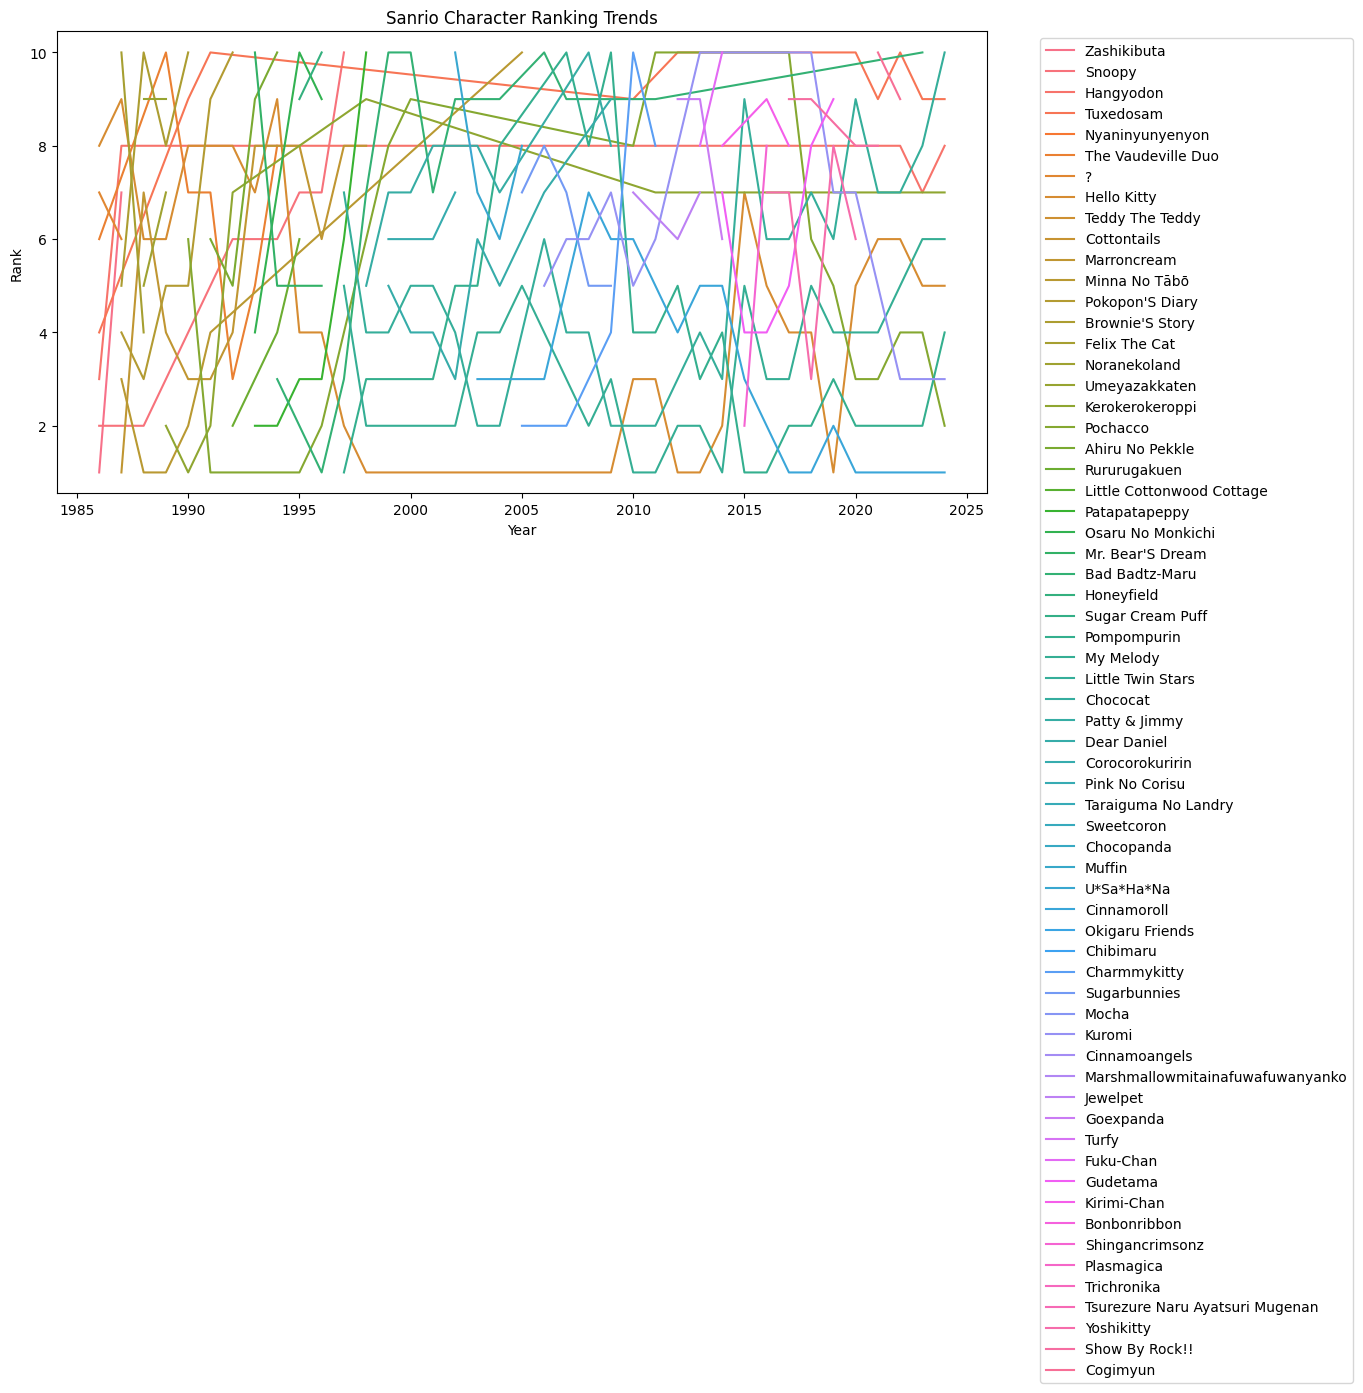

In [10]:
# Import Libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Ranking Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Rank', hue='Character Name')
plt.title('Sanrio Character Ranking Trends')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves the legend outside the plot
plt.show()


Boxplot for Rank Stability

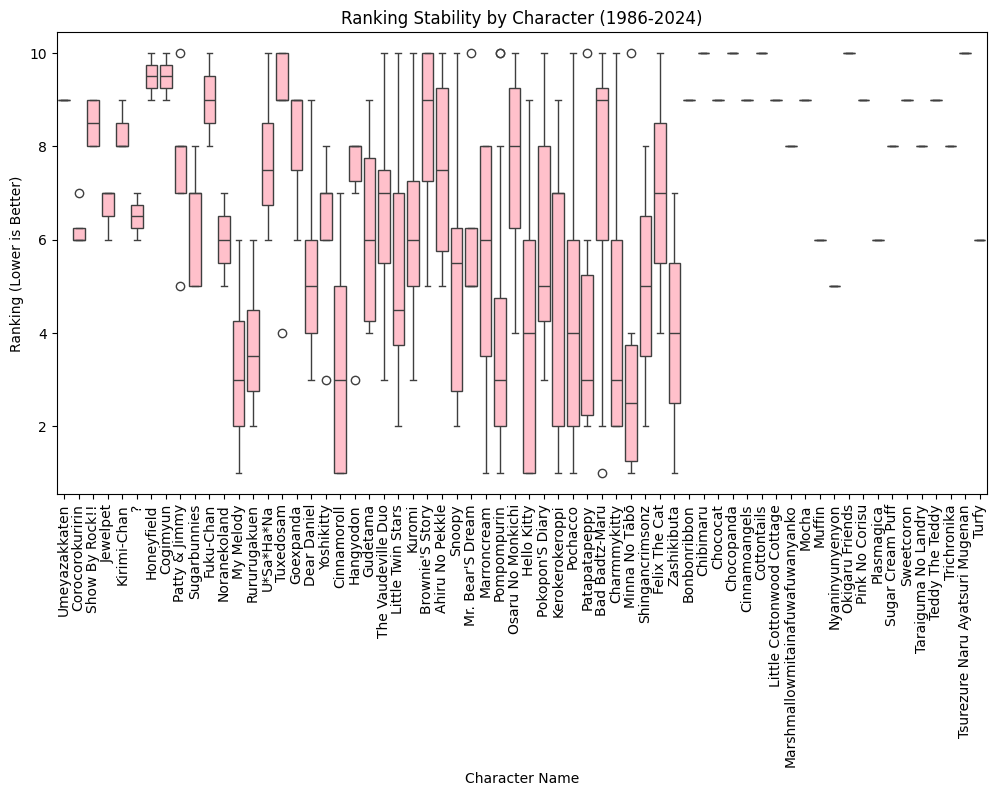

In [11]:
# Rank Stability
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='Character Name', 
    y='Rank', 
    order=df.groupby('Character Name')['Rank'].std().sort_values().index, 
    boxprops=dict(facecolor='pink')  # Sets box color to pink
)
plt.xticks(rotation=90)
plt.title('Ranking Stability by Character (1986-2024)')
plt.ylabel('Ranking (Lower is Better)')
plt.xlabel('Character Name')
plt.show()


In [ ]:
# Check Year Data
print(df['Year'].unique()) #Troubleshooting 

<DatetimeArray>
['1986-01-01 00:00:00', '1987-01-01 00:00:00', '1988-01-01 00:00:00',
 '1989-01-01 00:00:00', '1990-01-01 00:00:00', '1991-01-01 00:00:00',
 '1992-01-01 00:00:00', '1993-01-01 00:00:00', '1994-01-01 00:00:00',
 '1995-01-01 00:00:00', '1996-01-01 00:00:00', '1997-01-01 00:00:00',
 '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2000-01-01 00:00:00',
 '2001-01-01 00:00:00', '2002-01-01 00:00:00', '2003-01-01 00:00:00',
 '2004-01-01 00:00:00', '2005-01-01 00:00:00', '2006-01-01 00:00:00',
 '2007-01-01 00:00:00', '2008-01-01 00:00:00', '2009-01-01 00:00:00',
 '2010-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00',
 '2013-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00',
 '2016-01-01 00:00:00', '2017-01-01 00:00:00', '2018-01-01 00:00:00',
 '2019-01-01 00:00:00', '2020-01-01 00:00:00', '2021-01-01 00:00:00',
 '2022-01-01 00:00:00', '2023-01-01 00:00:00', '2024-01-01 00:00:00']
Length: 39, dtype: datetime64[ns]


Heatmap for Ranking Fluctuations

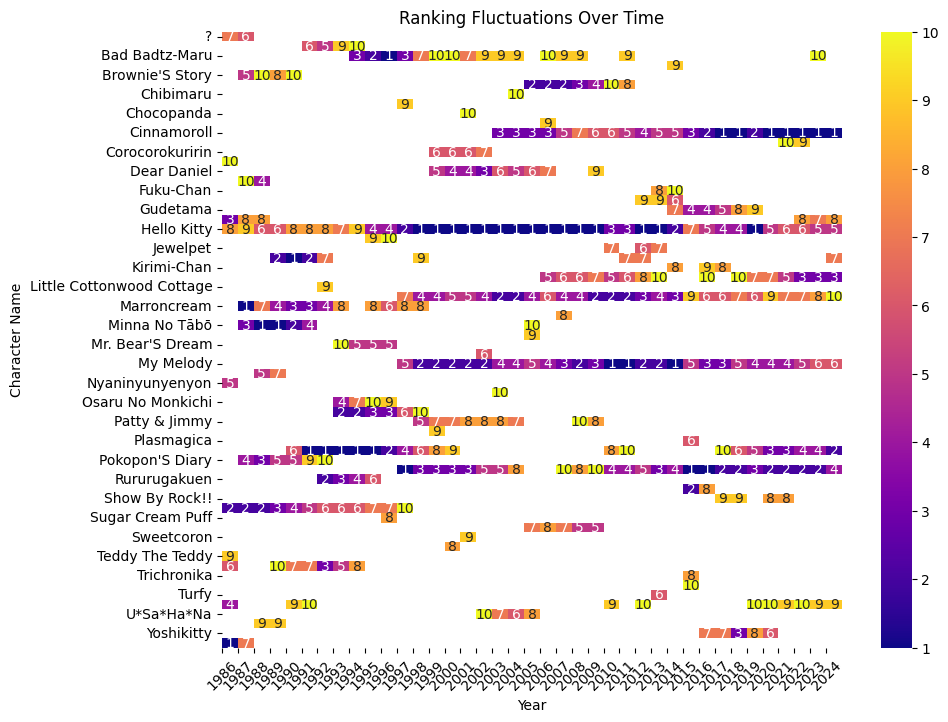

In [ ]:
# Ensure 'Year' is in datetime and extracts the year 
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year.astype(int) # Troubleshooting solved with help from ChatGPT

# Ranking Flactuations

# Pivot table for heatmap
pivot_table = df.pivot_table(index='Character Name', columns='Year', values='Rank')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='plasma', annot=True)
plt.title('Ranking Fluctuations Over Time')
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.show()

Bar Chart for Most Number 1 Finishes 

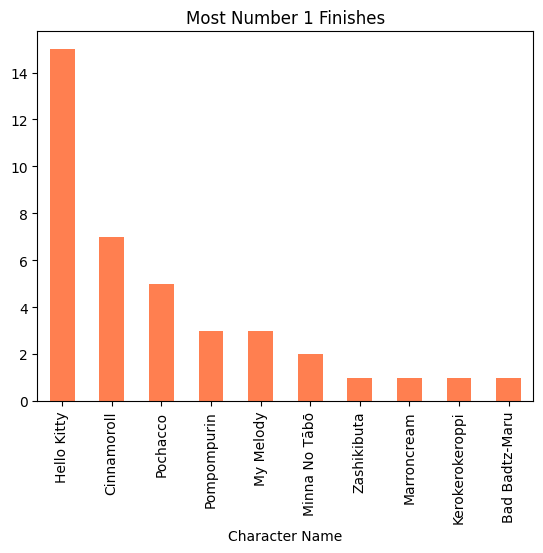

In [ ]:
# Most Number 1 Finishes
num_one_finishes = df[df['Rank'] == 1]['Character Name'].value_counts()
num_one_finishes.plot(kind='bar', color='coral', title='Most Number 1 Finishes')
plt.show()

---

## 4. AI and Machine Learning

- A linear regression model was chosen for predicting future ranking due to its interpretability and suitability for time series data 
- Mean Squared Error (MSE) was used to evaluate model performance, reflecting how well predicted values aligned with actual data 

In [20]:
# Import Libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Predicting Future Rankings

In [22]:
X = df[['Year']].values
y = df[['Rank']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print('Mean Squared Error', mean_squared_error(y_test, y_pred))

Mean Squared Error 8.128618879848792


Expanded Code for Model Evaluation

In [ ]:
# Improves the AI model beyond MSE

from sklearn.metrics import mean_absolute_error, r2_score

# Additional Metrics 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Got help from ChatGPT to fulfill Learning Outcome 7 (LO7)

Mean Squared Error (MSE): 8.13
Mean Absolute Error (MAE): 2.49
R-squared (R²): -0.01


Regression Line Visual

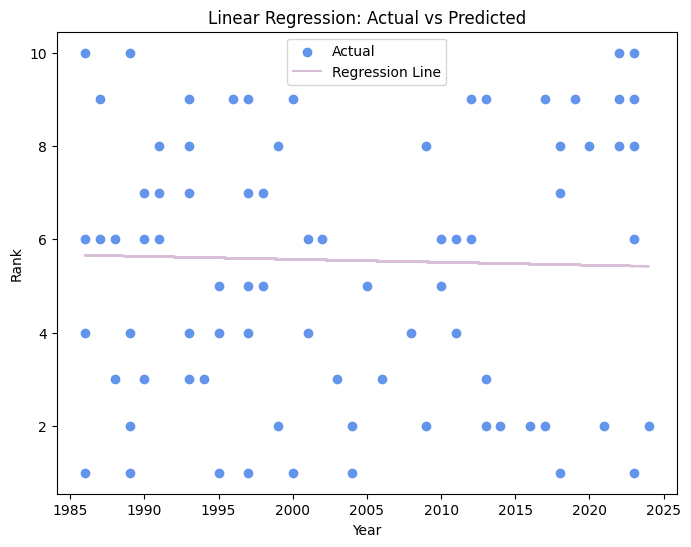

In [25]:
import matplotlib.pyplot as plt

# Actual vs Predicted 
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='cornflowerblue', label='Actual')
plt.plot(X_test, y_pred, color='thistle', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

---

## 5. Ethical Considerations 

- Given the dataset's potential bias towards regional preferences and marketing influence, these limitations were acknowledged to ensure responsible data interpretation 

In [27]:
# Document Ethical Concerns and Data Biases 
ethic_notes = "Ranking data may reflect marketing influences and regional biases. AI predictions may inherit these biases"
print(ethic_notes)

Ranking data may reflect marketing influences and regional biases. AI predictions may inherit these biases


---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
